Step-1 Understanding the DataSet

==>Load data set & import essential libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import warnings

warnings.filterwarnings("ignore")





In [2]:
#loading the dataset

loan_data = pd.read_csv(r"C:\Users\syed9\Desktop\rty\DSA LOAN PROJECT\loan_data.csv")

In [3]:
#head() function to see the first 5 rows and columns

loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# shape to see number of rows and columns

loan_data.shape

(45000, 14)

In [5]:
#to see the data types of each and every columns

loan_data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
# lets found out how many null values are present in the dataset

loan_data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
#check for dupllicates 

loan_data.duplicated().sum()

np.int64(0)

In [8]:
#basic information about the data 

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
categorical_columns = loan_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nvalue counts for {col}:\n")
    print(loan_data[col].value_counts())


value counts for person_gender:

person_gender
male      24841
female    20159
Name: count, dtype: int64

value counts for person_education:

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

value counts for person_home_ownership:

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

value counts for loan_intent:

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

value counts for previous_loan_defaults_on_file:

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


In [10]:
#to see column names 
loan_data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

Step 2: Exploratory Data Analysis (EDA)

EDA helps us:

Understand the shape and behavior of the data

Find patterns and relationships

Detect outliers, missing values, or errors

Summary statistics: Mean, median, min, max, etc.

In [11]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Check for Missing Values
Before analyzing or visualizing any data, it’s super important to check if any values are missing (null/NaN) in the dataset.

In [12]:
loan_data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Step 1: Univariate Analysis
 We’ll analyze one variable at a time.

We'll explore:

Numerical columns

Categorical columns

Histograms & KDE Plots (Numerical Distributions)

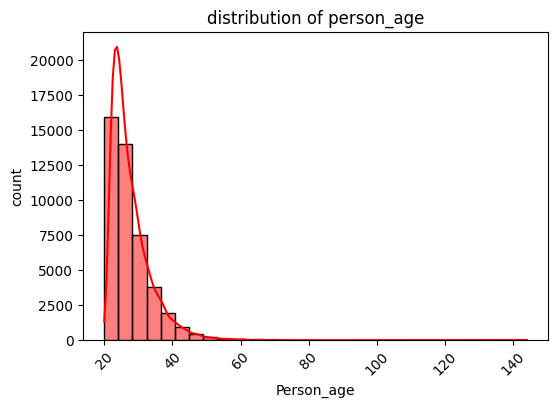

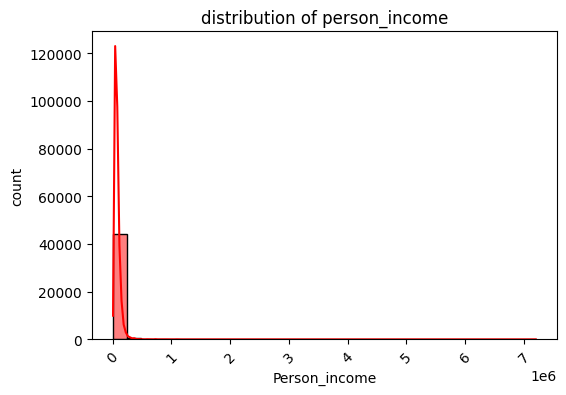

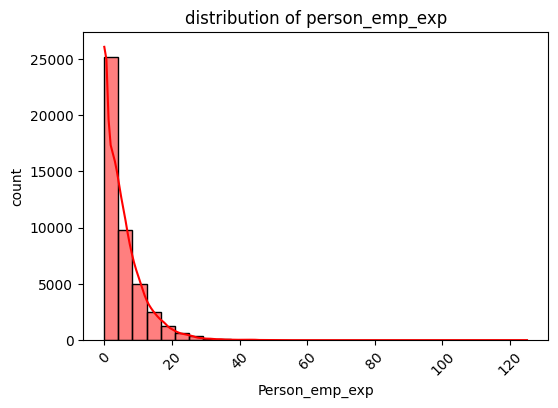

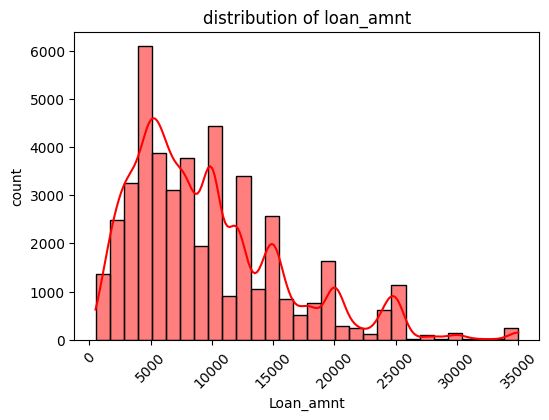

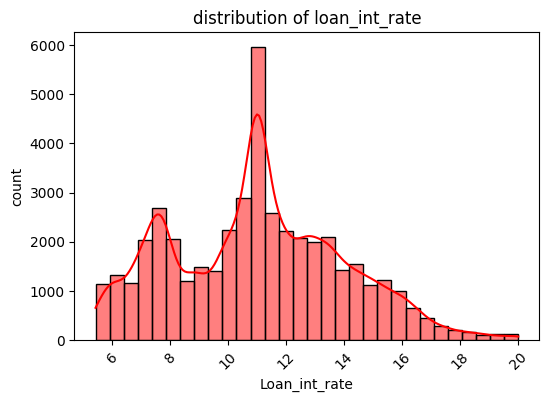

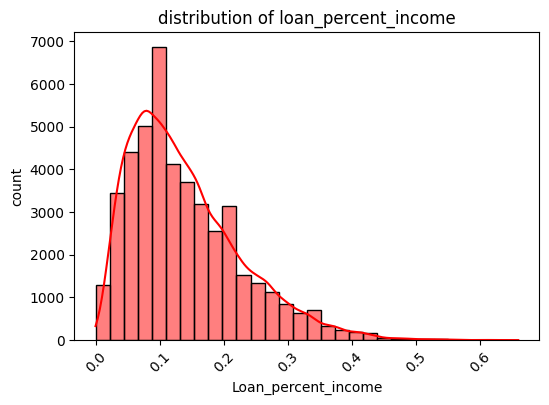

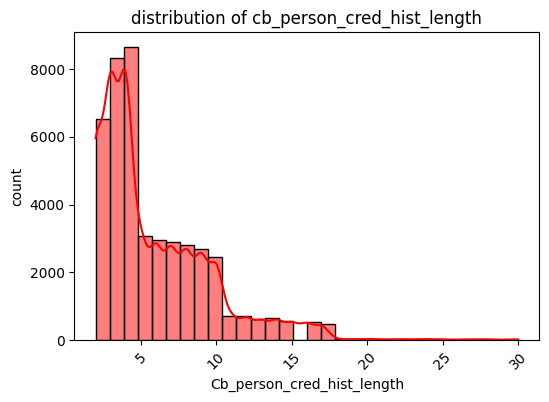

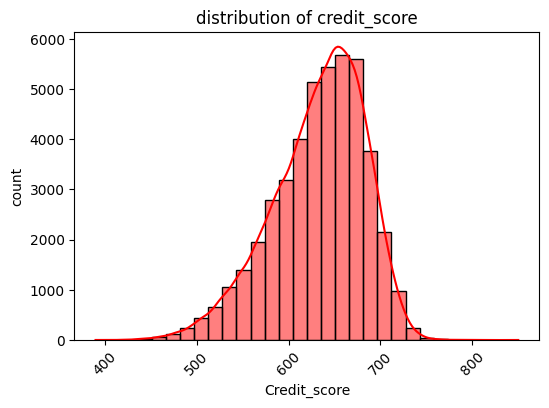

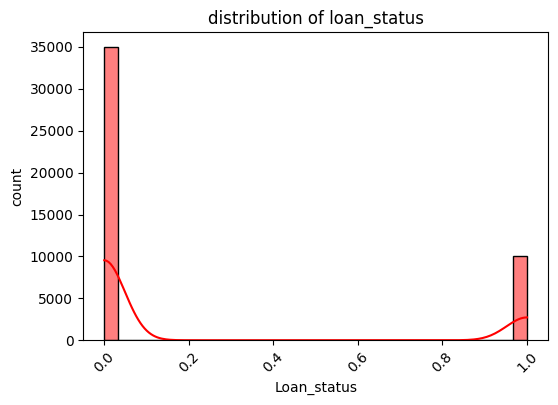

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

num_col  = loan_data.select_dtypes(include='number').columns

for col in num_col:
    plt.figure(figsize=(6,4))
    sns.histplot(loan_data[col],kde=True,bins=30,color='red')
    plt.title(f"distribution of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.show()


In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

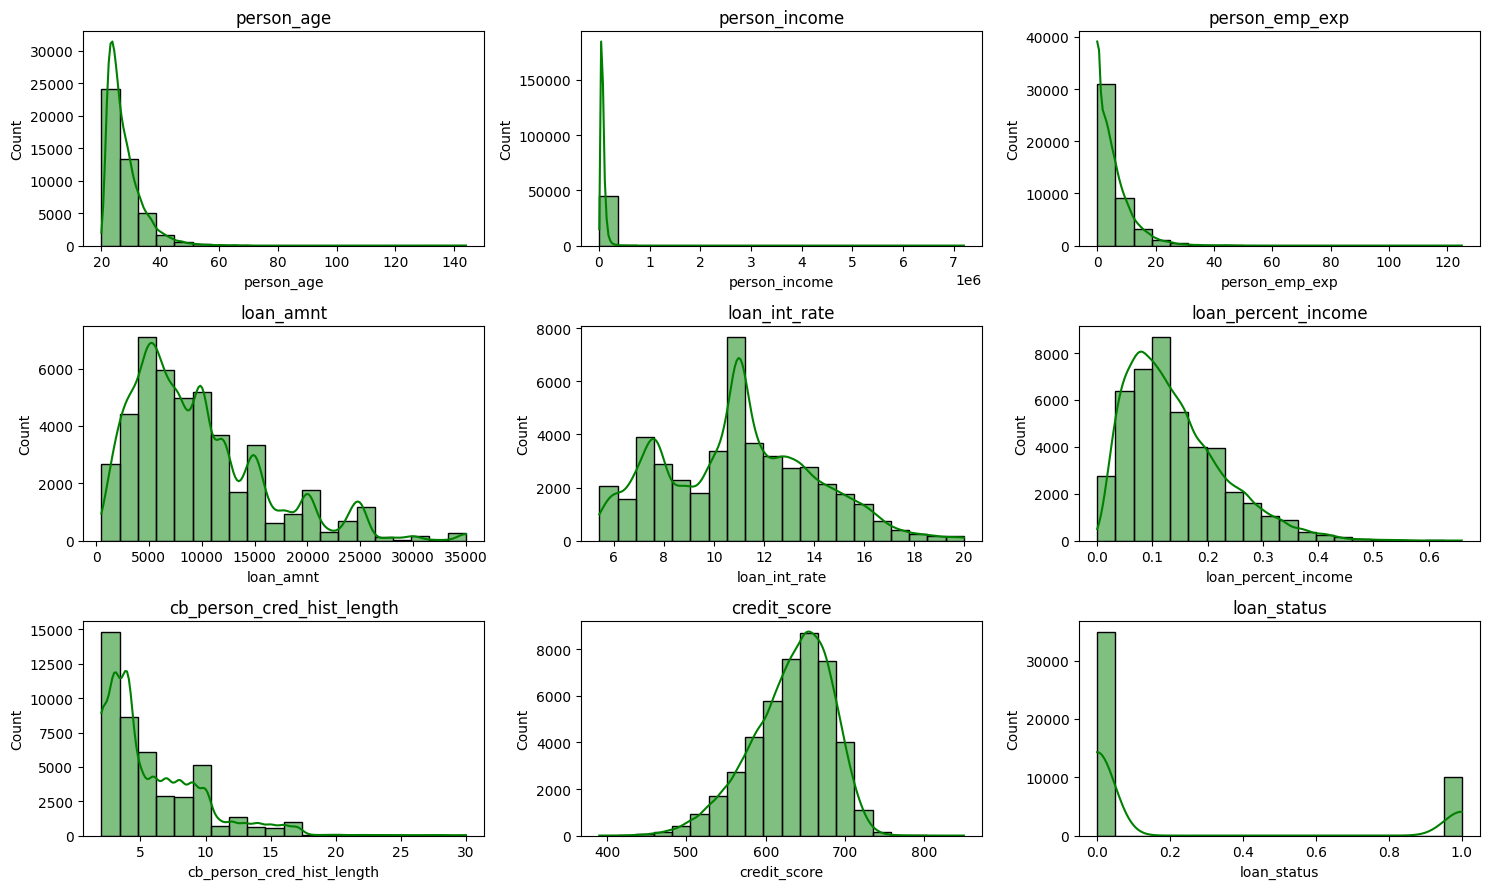

In [15]:
num_col = loan_data.select_dtypes(include=['number']).columns

fig,axes = plt.subplots(nrows=3 ,ncols=3,figsize = (15,9))
for i,column in enumerate(num_col):
    row,col = divmod(i,3)
    sns.histplot(loan_data[column],kde=True,bins=20,color='green',ax=axes[row][col])
    axes[row][col].set_title(column)
    
plt.tight_layout()
plt.show()
    

Next Step: Categorical Feature Analysis
We'll analyze categorical features using bar plots and count plots to understand their distributions.

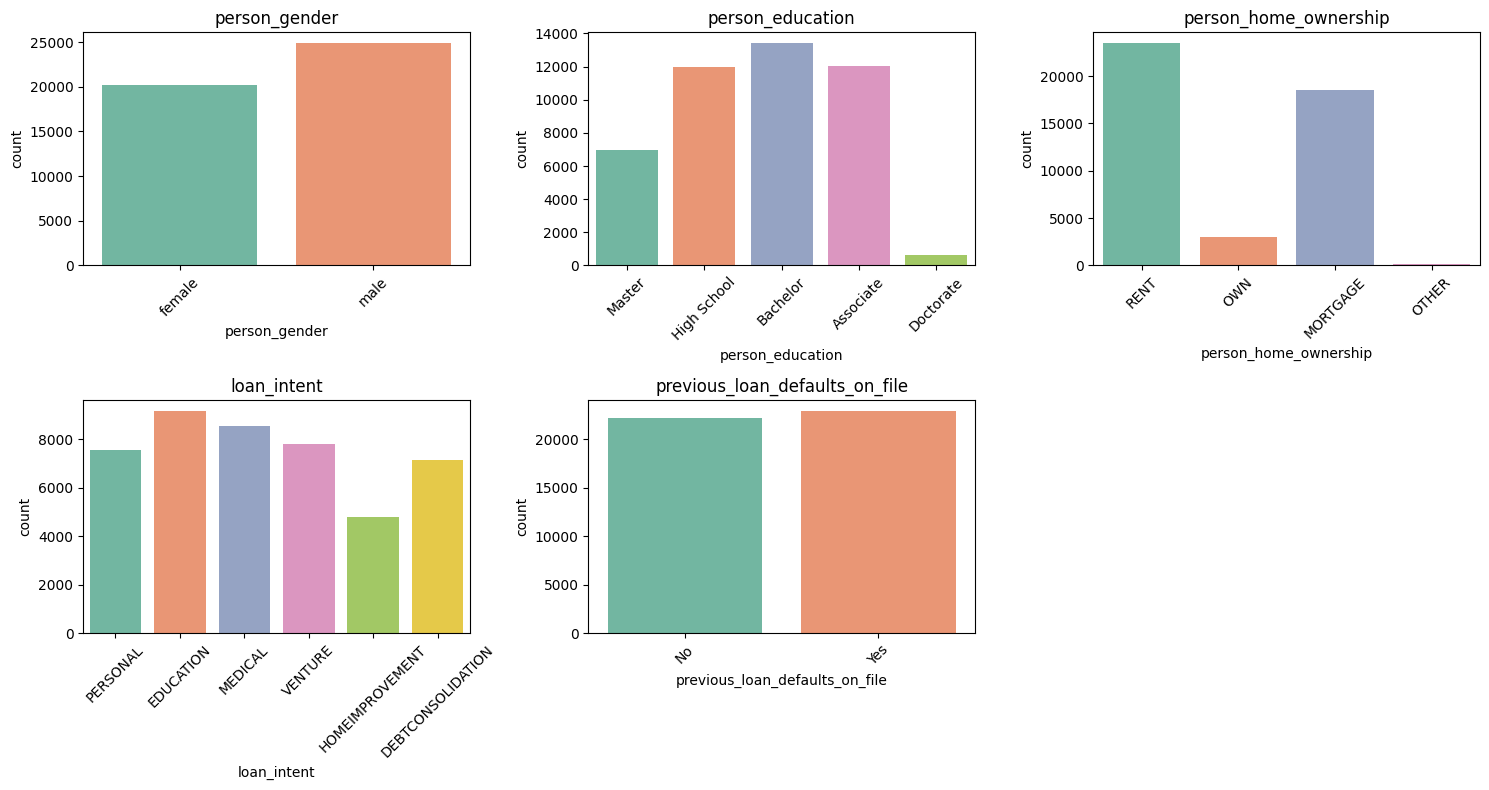

In [16]:
categorical_columns = loan_data.select_dtypes(include=['object']).columns

fig,axes = plt.subplots(2,3,figsize=(15,8))
axis = axes.flatten()  #flatten 2D array to 1D Array

for i,col in enumerate(categorical_columns):
    row,col_idx = divmod(i,3)
    
    sns.countplot(data=loan_data,x = col,ax=axis[i],palette='Set2')   
    axis[i].set_title(col)
    axis[i].tick_params(axis='x',rotation=45)
 

for j in range(len(categorical_columns), len(axis)):
    fig.delaxes(axis[j])      
    
    
plt.tight_layout()
plt.show()    


Bivariate Analysis
 let’s move to bivariate analysis relationship between two variables

Compute Correlation Matrix

In [17]:
correlation_matrix = loan_data.select_dtypes(include=['number']).corr()

correlation_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


Heatmap: Visualizing Correlation

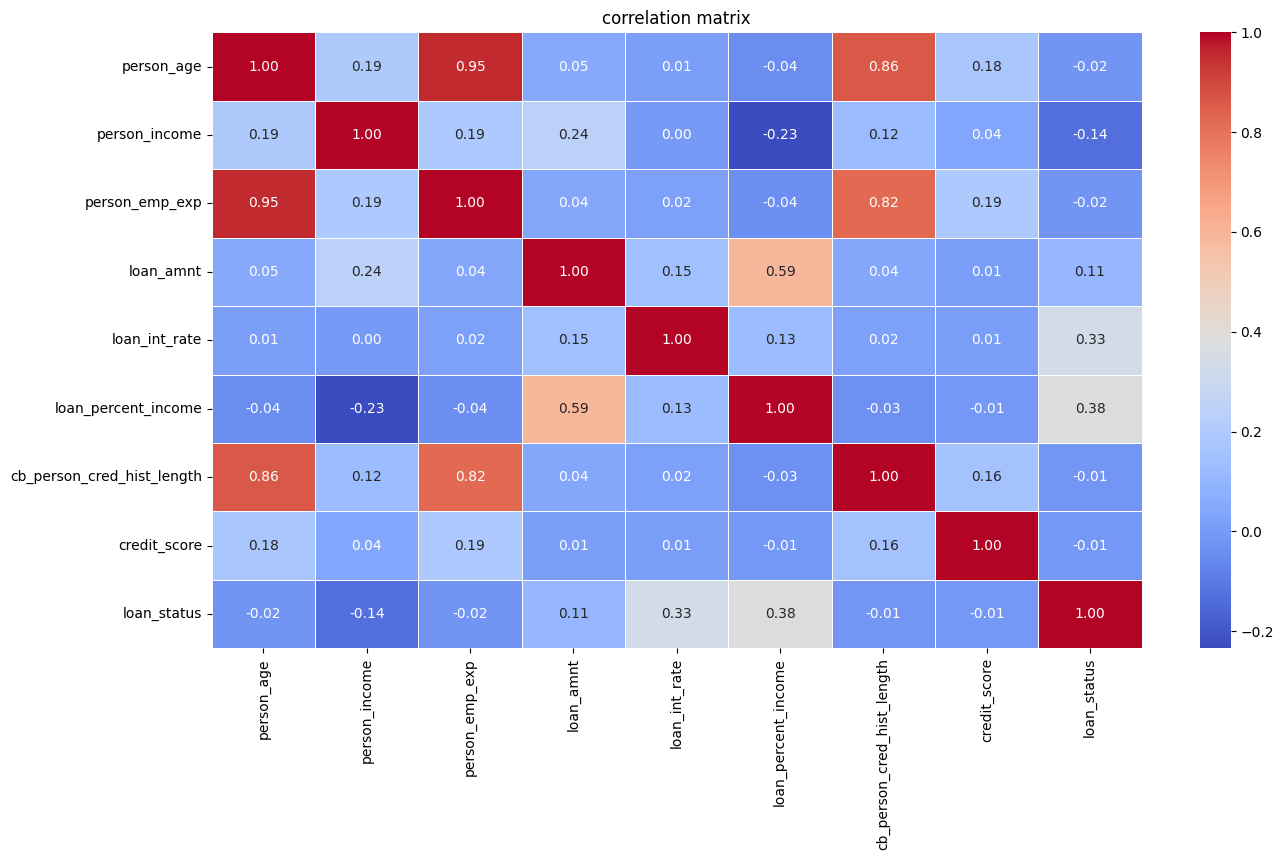

In [18]:
correlation_matrix = loan_data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(15,8))

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('correlation matrix')
plt.show()

Scatter Plot: Checking Relationships

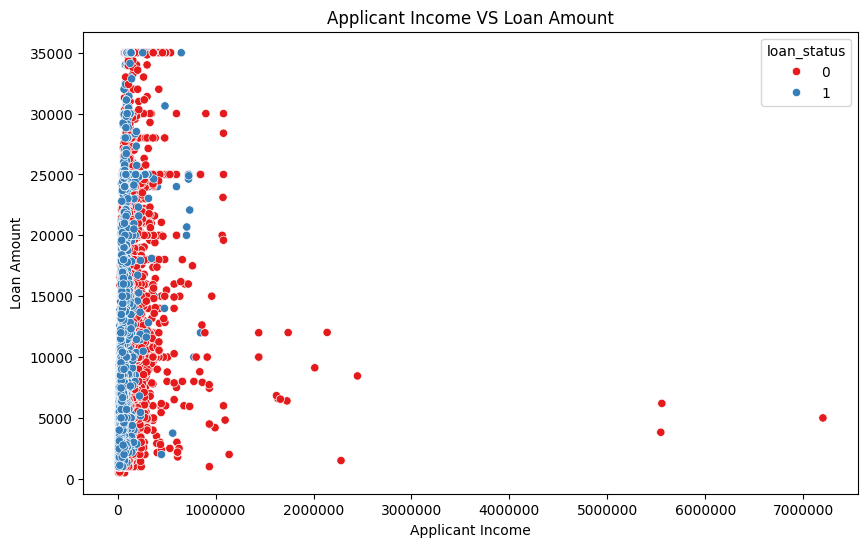

In [19]:
plt.figure(figsize=(10,6))

loan_data['person_income'] = pd.to_numeric(loan_data['person_income'], errors='coerce')
sns.scatterplot(data=loan_data,x= 'person_income',y = 'loan_amnt',hue='loan_status',palette='Set1')


plt.ticklabel_format(style='plain', axis='x')  # to avoid scientific notation
plt.title('Applicant Income VS Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

Visualization	Use Case
Heatmap	Checks overall correlation between numerical columns.
Scatter Plot	Examines relationship between two specific numerical variables.

Bivariate Analysis – Categorical vs Target Variable (loan_status)

 Plot Countplots for Categorical vs Loan Status

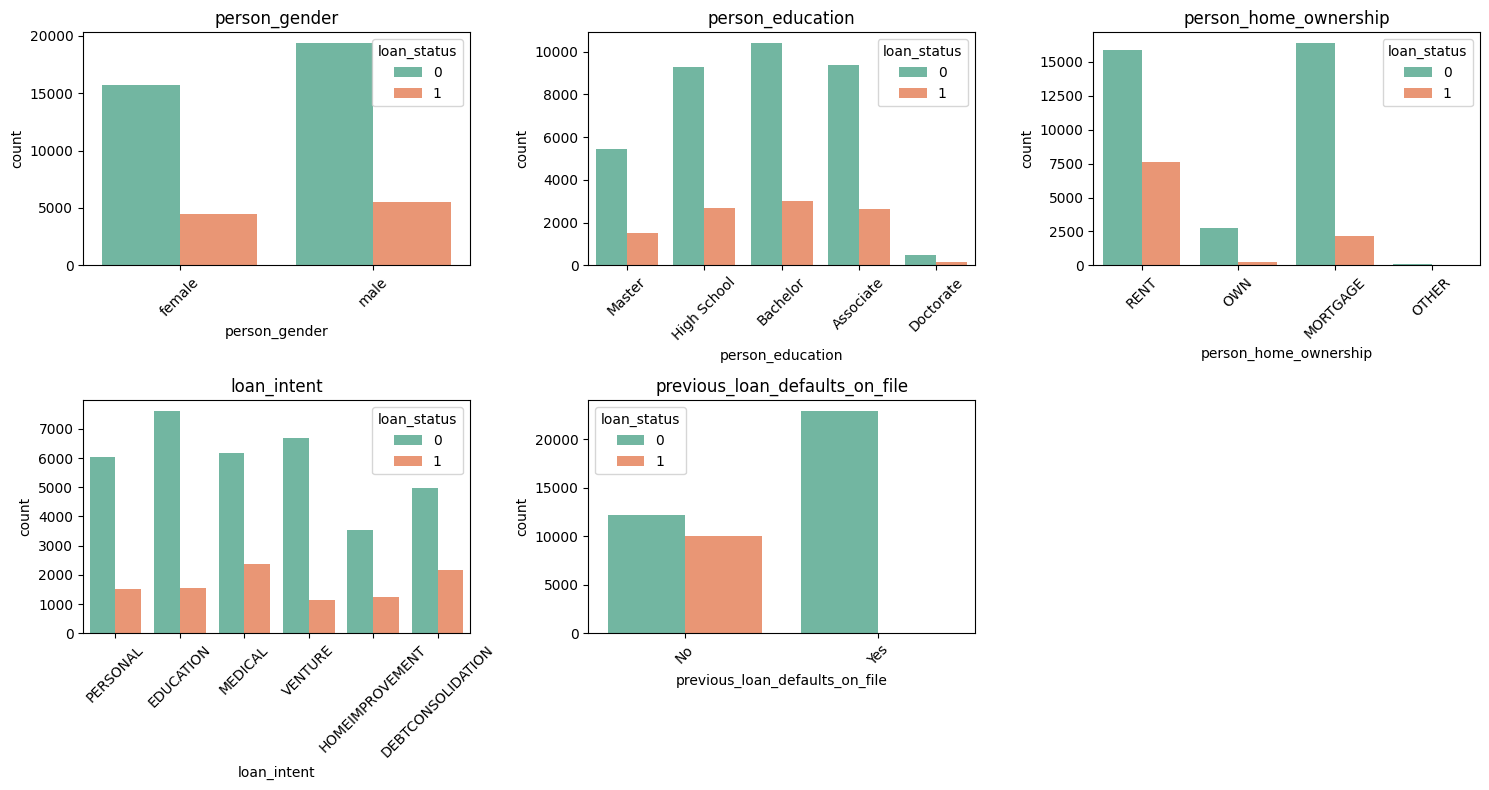

In [20]:
cat_col = loan_data.select_dtypes(include=['object']).columns

fig,axes = plt.subplots(2,3,figsize=(15,8))
axes = axes.flatten()  # Add this line after plt.subplots



for i,col in enumerate(cat_col):
      row,col_idx = divmod(i,3)
      sns.countplot(data=loan_data,x = col,hue='loan_status',palette='Set2',ax=axes[i])
      axes[i].set_title(col)
      axes[i].tick_params(axis='x',rotation=45)
      
for j in range(len(cat_col), len(axes)):
    fig.delaxes(axes[j])      
 
plt.tight_layout()
plt.show()      

Categorical vs Categorical Analysis

Cross-tabulation (as a table) – to see percentage distribution

Countplots (as visuals) – to visually compare two categorical columns

In [21]:
cat_col = loan_data.select_dtypes(include=['object']).columns

target_col = 'loan_status'
for col in cat_col:
      if col != target_col:
            print(f"cross-tab between {col} and {target_col}")
            ct = pd.crosstab(loan_data[col],loan_data[target_col],normalize='index')*100
            print(ct.round(2))

cross-tab between person_gender and loan_status
loan_status        0      1
person_gender              
female         77.75  22.25
male           77.80  22.20
cross-tab between person_education and loan_status
loan_status           0      1
person_education              
Associate         77.97  22.03
Bachelor          77.48  22.52
Doctorate         77.13  22.87
High School       77.69  22.31
Master            78.24  21.76
cross-tab between person_home_ownership and loan_status
loan_status                0      1
person_home_ownership              
MORTGAGE               88.40  11.60
OTHER                  66.67  33.33
OWN                    92.48   7.52
RENT                   67.60  32.40
cross-tab between loan_intent and loan_status
loan_status            0      1
loan_intent                    
DEBTCONSOLIDATION  69.73  30.27
EDUCATION          83.04  16.96
HOMEIMPROVEMENT    73.70  26.30
MEDICAL            72.18  27.82
PERSONAL           79.86  20.14
VENTURE            85.57  14.4

countplot() to visualize how each categorical feature relates to loan_status.

EDA: Outlier Detection & Handling

Detect Outliers using Boxplots (One by One or in Grid)

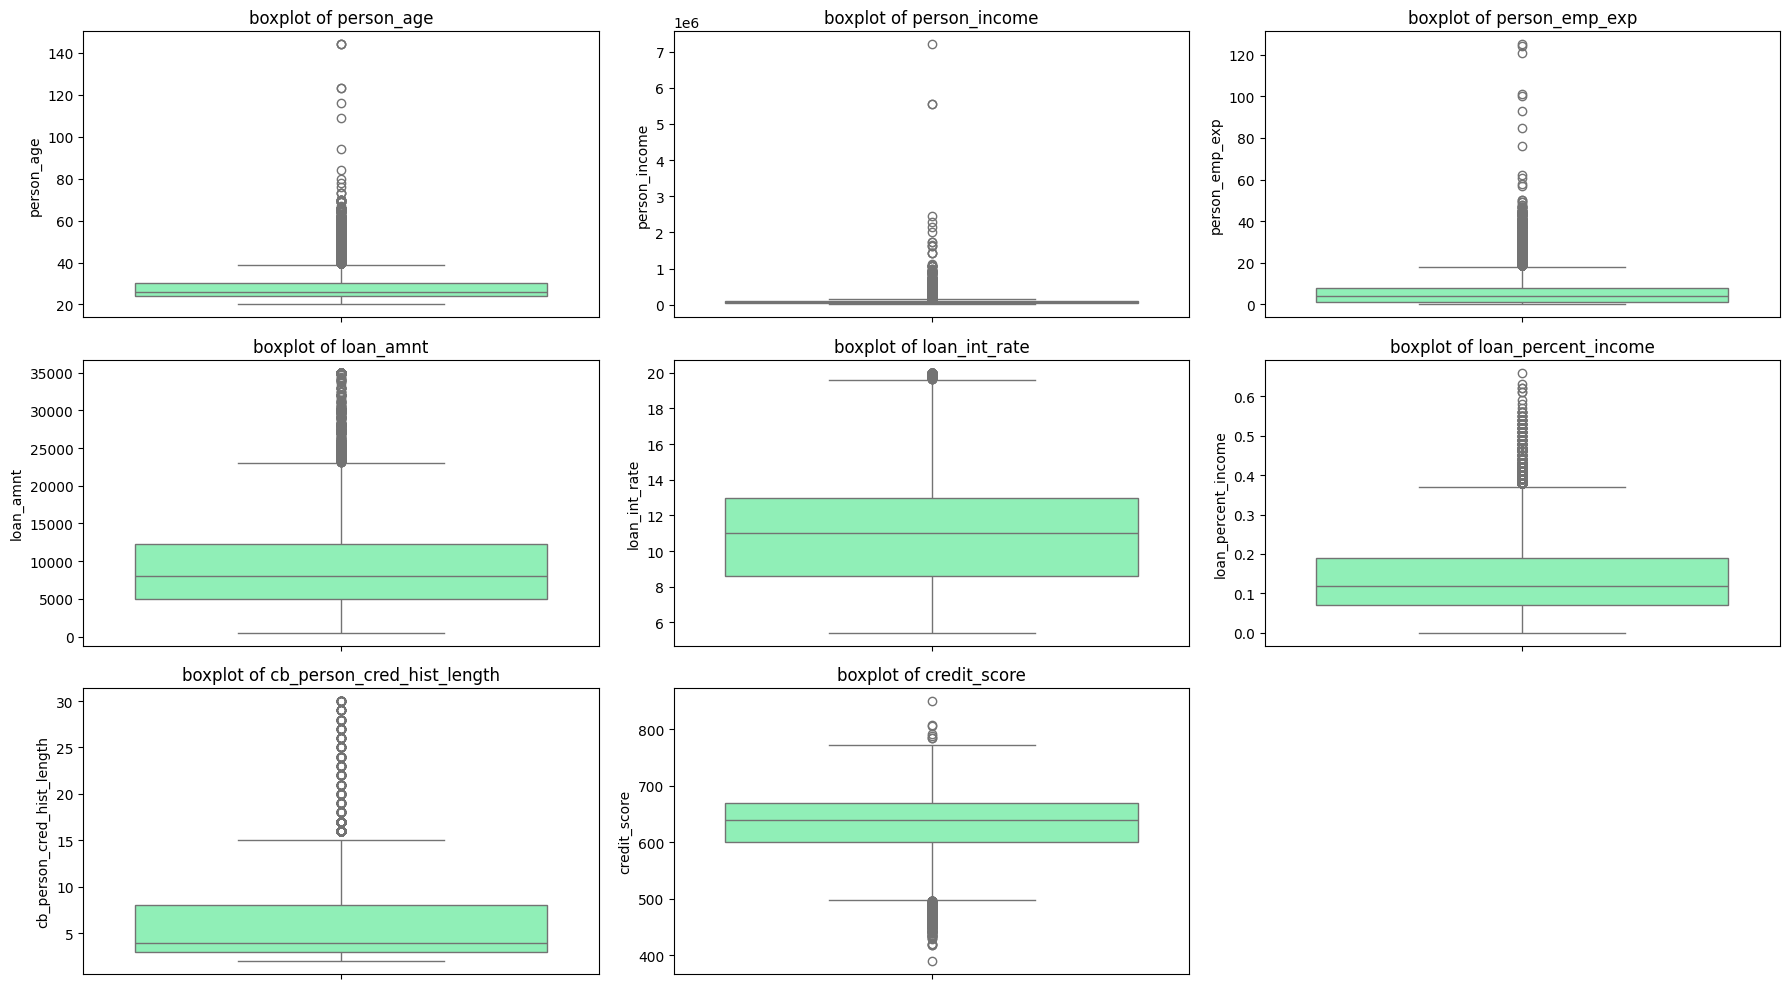

In [22]:
num_col = [col for col in loan_data.select_dtypes(include='number').columns if col != 'loan_status']



# 2. Set number of columns per row (you can change this value if you want)
cols_per_row = 3

# 3. Calculate number of rows needed
rows = math.ceil(len(num_col) / cols_per_row)

fig,axis = plt.subplots(rows,cols_per_row,figsize=(18,10))
axis = axis.flatten()

for i,col in enumerate(num_col):
        
      
      sns.boxplot(data=loan_data,y=col,ax = axis[i],palette='rainbow')
      axis[i].set_title(f"boxplot of {col}")
      
for j in range(len(num_col),len(axis)):
      fig.delaxes(axis[j])
      
plt.tight_layout()
plt.show()            

Detecting Outliers (IQR Method)

In [23]:
loan_data.dtypes['loan_status']


dtype('int64')

In [24]:

num_col = [col for col in loan_data.select_dtypes(include='number').columns if col != 'loan_status']


outlier_summary = {}


for col in num_col:
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    LOWER_BOUND = Q1 - 1.5 * IQR
    UPPER_BOUND = Q3 + 1.5 * IQR

    outlier = loan_data[(loan_data[col] < LOWER_BOUND) | (loan_data[col] > UPPER_BOUND)]
    outlier_count = outlier.shape[0]
    outlier_summary[col] = outlier_count


pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['outlier_count'])
    

,outlier_count
person_age,2188
person_income,2218
person_emp_exp,1724
loan_amnt,2348
loan_int_rate,124
loan_percent_income,744
cb_person_cred_hist_length,1366
credit_score,467


Outlier Handling (Removing or Capping)

We can handle outliers in 2 common ways:

Remove the rows containing outliers.

Cap/clip the outlier values to upper/lower thresholds.

Let’s go with removing outliers for now, using the IQR method we used earlier.



In [25]:
loan_data_cleaned = loan_data.copy()

for col in num_col:
      Q1 = loan_data_cleaned[col].quantile(0.25)
      Q3 = loan_data_cleaned[col].quantile(0.75)
      IQR  =  Q3 - Q1
      
      LOWER_BOUND = Q1 - 1.5 * IQR
      UPPER_BOUND = Q3 + 1.5 * IQR 
      
      loan_data_cleaned = loan_data_cleaned[(loan_data_cleaned[col] >= LOWER_BOUND) & (loan_data_cleaned[col] <= UPPER_BOUND)]
      
print(f"original data set shape : {loan_data.shape}")
print(f"cleaned data set shape : {loan_data_cleaned.shape}")
      

original data set shape : (45000, 14)
cleaned data set shape : (36065, 14)


In [26]:
loan_data_cleaned.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
26,21.0,female,Associate,14288.0,0,MORTGAGE,4575.0,VENTURE,17.74,0.32,3.0,626,No,1
27,23.0,male,High School,14293.0,0,OWN,1400.0,PERSONAL,9.32,0.10,3.0,607,No,0
29,21.0,female,Bachelor,14988.0,0,OTHER,4000.0,EDUCATION,12.84,0.27,2.0,553,No,1
30,21.0,male,High School,14858.0,0,OWN,2000.0,MEDICAL,11.12,0.13,3.0,589,No,1
35,21.0,male,Associate,15150.0,0,OWN,2500.0,EDUCATION,7.51,0.17,4.0,600,No,1


In [27]:
correlation_matrix = loan_data_cleaned.select_dtypes(include=['number']).corr()

correlation_matrix

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.098042,0.892523,0.040208,0.003207,-0.032407,0.791153,0.120197,-0.025627
person_income,0.098042,1.000000,0.078113,0.375179,-0.064933,-0.360493,0.062413,0.014353,-0.259441
person_emp_exp,0.892523,0.078113,1.000000,0.034007,0.008649,-0.023499,0.713547,0.132864,-0.021748
loan_amnt,0.040208,0.375179,0.034007,1.000000,0.082158,0.642569,0.025524,0.000832,0.044236
loan_int_rate,0.003207,-0.064933,0.008649,0.082158,1.000000,0.111019,0.012694,0.005904,0.326936
loan_percent_income,-0.032407,-0.360493,-0.023499,0.642569,0.111019,1.000000,-0.020331,-0.013037,0.313842
cb_person_cred_hist_length,0.791153,0.062413,0.713547,0.025524,0.012694,-0.020331,1.000000,0.102620,-0.018503
credit_score,0.120197,0.014353,0.132864,0.000832,0.005904,-0.013037,0.102620,1.000000,-0.013501
loan_status,-0.025627,-0.259441,-0.021748,0.044236,0.326936,0.313842,-0.018503,-0.013501,1.000000


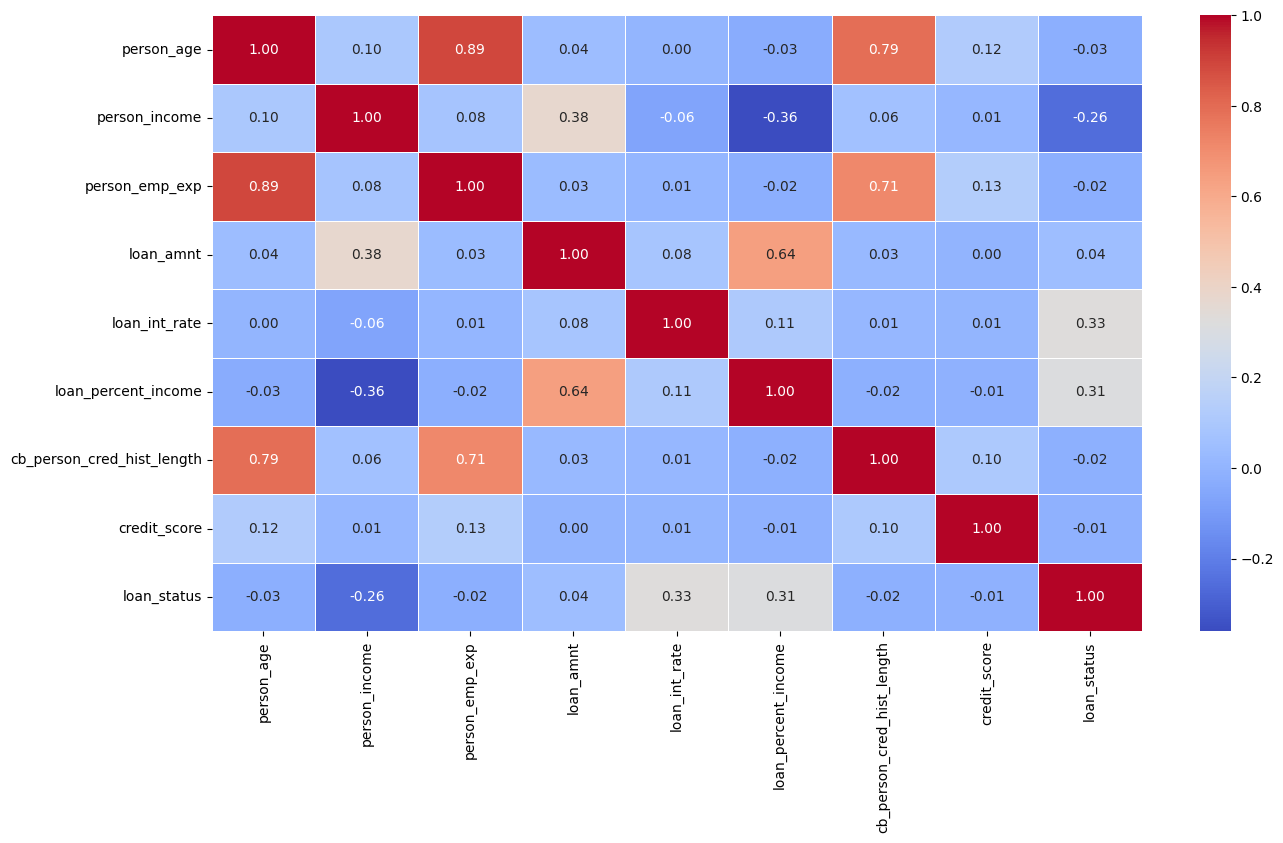

In [28]:
plt.figure(figsize=(15,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)

plt.show()

FEATURE ENGINEERING — PHASE 1: Create New Columns

In [29]:
# 1. Employment Experience Level

def categorize_experience():
      if loan_data_cleaned['person_emp_exp'] == 0:
            return 'No Experience'
      elif loan_data_cleaned['person_emp_exp'] <= 2:
            return 'Junior'
      elif loan_data_cleaned['person_emp_exp'] <= 5:
            return 'Mid'
      else:
            return 'Senior'
      
      loan_data_cleaned['Expereince_Level'] = loan_data_cleaned['person_emp_exp'].apply(categorize_experience)
      

In [30]:
# 2. Home Ownership Binary

loan_data_cleaned['is_home_owner'] = loan_data_cleaned['person_home_ownership'].apply(lambda x: 1 if x == 'OWN'else 0)

In [31]:
# 3. credit_score_bucket — Bucket credit scores

bins = [0,580,670,740,800,float('inf')]
labels = ['Poor','Fair','Good','Verygood','Excellent']
loan_data_cleaned['credit_score_bucket'] = pd.cut(loan_data_cleaned['credit_score'],bins=bins,labels=labels,right=False)

In [32]:
#4 . age category 

bins = [0,25,40,float('inf')]
labels = ['Junior','Mid','Senior']

loan_data_cleaned['age_category'] = pd.cut(loan_data_cleaned['person_age'],bins=bins,labels= labels,right=False)

In [33]:
loan_data_cleaned.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,is_home_owner,credit_score_bucket,age_category
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,1,Poor,Junior
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1,1,Poor,Junior
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1,1,Fair,Junior
19,24.0,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1,0,Good,Junior
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0,1,Fair,Junior


In [34]:
#drop irrelevent columns

cols_to_drop = [
      'person_age',
      'person_home_ownership',
      'credit_score'
      
      
]

loan_data_cleaned.drop(columns=cols_to_drop,inplace=True)

In [35]:
loan_data_cleaned.head()

,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status,is_home_owner,credit_score_bucket,age_category
1,female,High School,12282.0,0,1000.0,EDUCATION,11.14,0.08,2.0,Yes,0,1,Poor,Junior
5,female,High School,12951.0,0,2500.0,VENTURE,7.14,0.19,2.0,No,1,1,Poor,Junior
9,female,High School,12739.0,0,1600.0,VENTURE,14.74,0.13,3.0,No,1,1,Fair,Junior
19,female,Master,14283.0,1,1750.0,EDUCATION,10.99,0.12,2.0,No,1,0,Good,Junior
23,female,Bachelor,13866.0,0,1500.0,PERSONAL,7.29,0.11,3.0,Yes,0,1,Fair,Junior


1. Label Encoding
Use when categories have a meaningful order like:
credit_score_bucket = Poor < Fair < Good < VeryGood < Excellent




In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Make a copy so original stays untouched
df_encoded = loan_data_cleaned.copy()

df_encoded['credit_score_bucket'] = le.fit_transform(loan_data_cleaned['credit_score_bucket'])

In [37]:
# Binary column: Yes/No → 1/0
df_encoded['previous_loan_defaults_on_file'] = df_encoded['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [38]:
#gender
df_encoded['person_gender'] = df_encoded['person_gender'].map({'female':0,'male':1})

In [39]:
df_encoded['age_category'] = le.fit_transform(df_encoded['age_category'])

2. One-Hot Encoding
Use when categories have no order

In [40]:
df_encoded = pd.get_dummies(df_encoded,columns=['loan_intent','person_education'],dtype=int)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['credit_score_bucket', 'age_category']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

This converts:

Poor → 0, Fair → 1, ..., Excellent → 4

Junior, Mid, Senior (if applicable) → 0, 1, 2

In [42]:
##to show all the columns in the dataframe 
import pandas as pd
pd.set_option('display.max_columns', None)

df_encoded.head()


,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status,is_home_owner,credit_score_bucket,age_category,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
1,0,12282.0,0,1000.0,11.14,0.08,2.0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0
5,0,12951.0,0,2500.0,7.14,0.19,2.0,0,1,1,2,0,0,0,0,0,0,1,0,0,0,1,0
9,0,12739.0,0,1600.0,14.74,0.13,3.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
19,0,14283.0,1,1750.0,10.99,0.12,2.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
23,0,13866.0,0,1500.0,7.29,0.11,3.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [43]:
df_encoded.head()

,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status,is_home_owner,credit_score_bucket,age_category,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
1,0,12282.0,0,1000.0,11.14,0.08,2.0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0
5,0,12951.0,0,2500.0,7.14,0.19,2.0,0,1,1,2,0,0,0,0,0,0,1,0,0,0,1,0
9,0,12739.0,0,1600.0,14.74,0.13,3.0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
19,0,14283.0,1,1750.0,10.99,0.12,2.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
23,0,13866.0,0,1500.0,7.29,0.11,3.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


scaling 

In [44]:
scl_col = ['person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

from sklearn.preprocessing import StandardScaler

se = StandardScaler()

df_encoded[scl_col] = se.fit_transform(df_encoded[scl_col])


In [45]:
df_encoded[scl_col].head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1,-1.830558,-1.521531,0.088362,-0.694715,-1.131487
5,-1.809362,-1.207867,-1.277781,0.841907,-1.131487
9,-1.816079,-1.396065,1.317892,0.003749,-0.754084
19,-1.767160,-1.364699,0.037132,-0.135944,-1.131487
23,-1.780372,-1.416976,-1.226551,-0.275637,-0.754084


In [46]:
df_encoded.head()

,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,previous_loan_defaults_on_file,loan_status,is_home_owner,credit_score_bucket,age_category,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
1,0,-1.830558,0,-1.521531,0.088362,-0.694715,-1.131487,1,0,1,2,0,0,1,0,0,0,0,0,0,0,1,0
5,0,-1.809362,0,-1.207867,-1.277781,0.841907,-1.131487,0,1,1,2,0,0,0,0,0,0,1,0,0,0,1,0
9,0,-1.816079,0,-1.396065,1.317892,0.003749,-0.754084,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
19,0,-1.767160,1,-1.364699,0.037132,-0.135944,-1.131487,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
23,0,-1.780372,0,-1.416976,-1.226551,-0.275637,-0.754084,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


Step 7 - Insights & Visualization 

"Analyzing Loan Status Trends: Correlation Insights & Key Patterns"

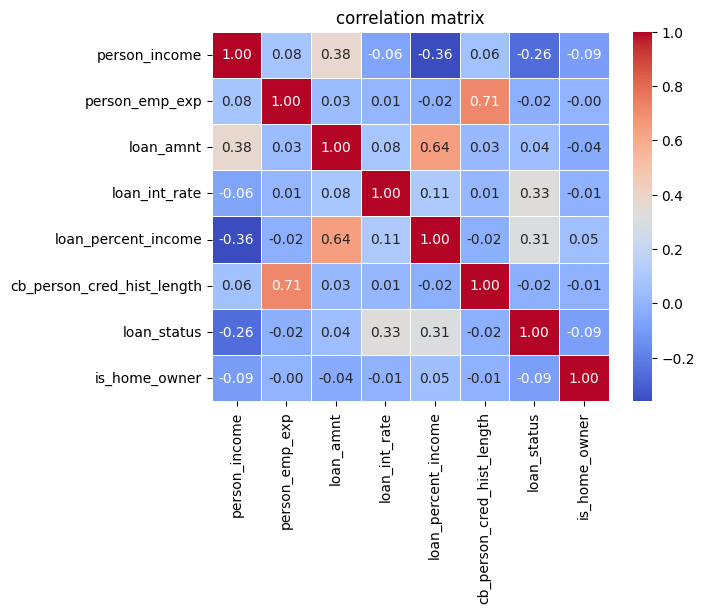

In [47]:
#understadnding the relationship between numeric variables

correlation_matrix = loan_data_cleaned.select_dtypes(include=['int64','float64']).corr()



plt.Figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',linewidths=0.5,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

Insights from the Heat Map 

1.- Higher income → Bigger loan (moderate correlation).

2.- Higher interest rate → More loan defaults (moderate correlation)

3.Bigger loan → Higher income percentage needed for repayment (strong correlation).

4.More work experience → Longer credit history (strong correlation).

5.Homeownership doesn’t strongly affect loan status (weak correlation)










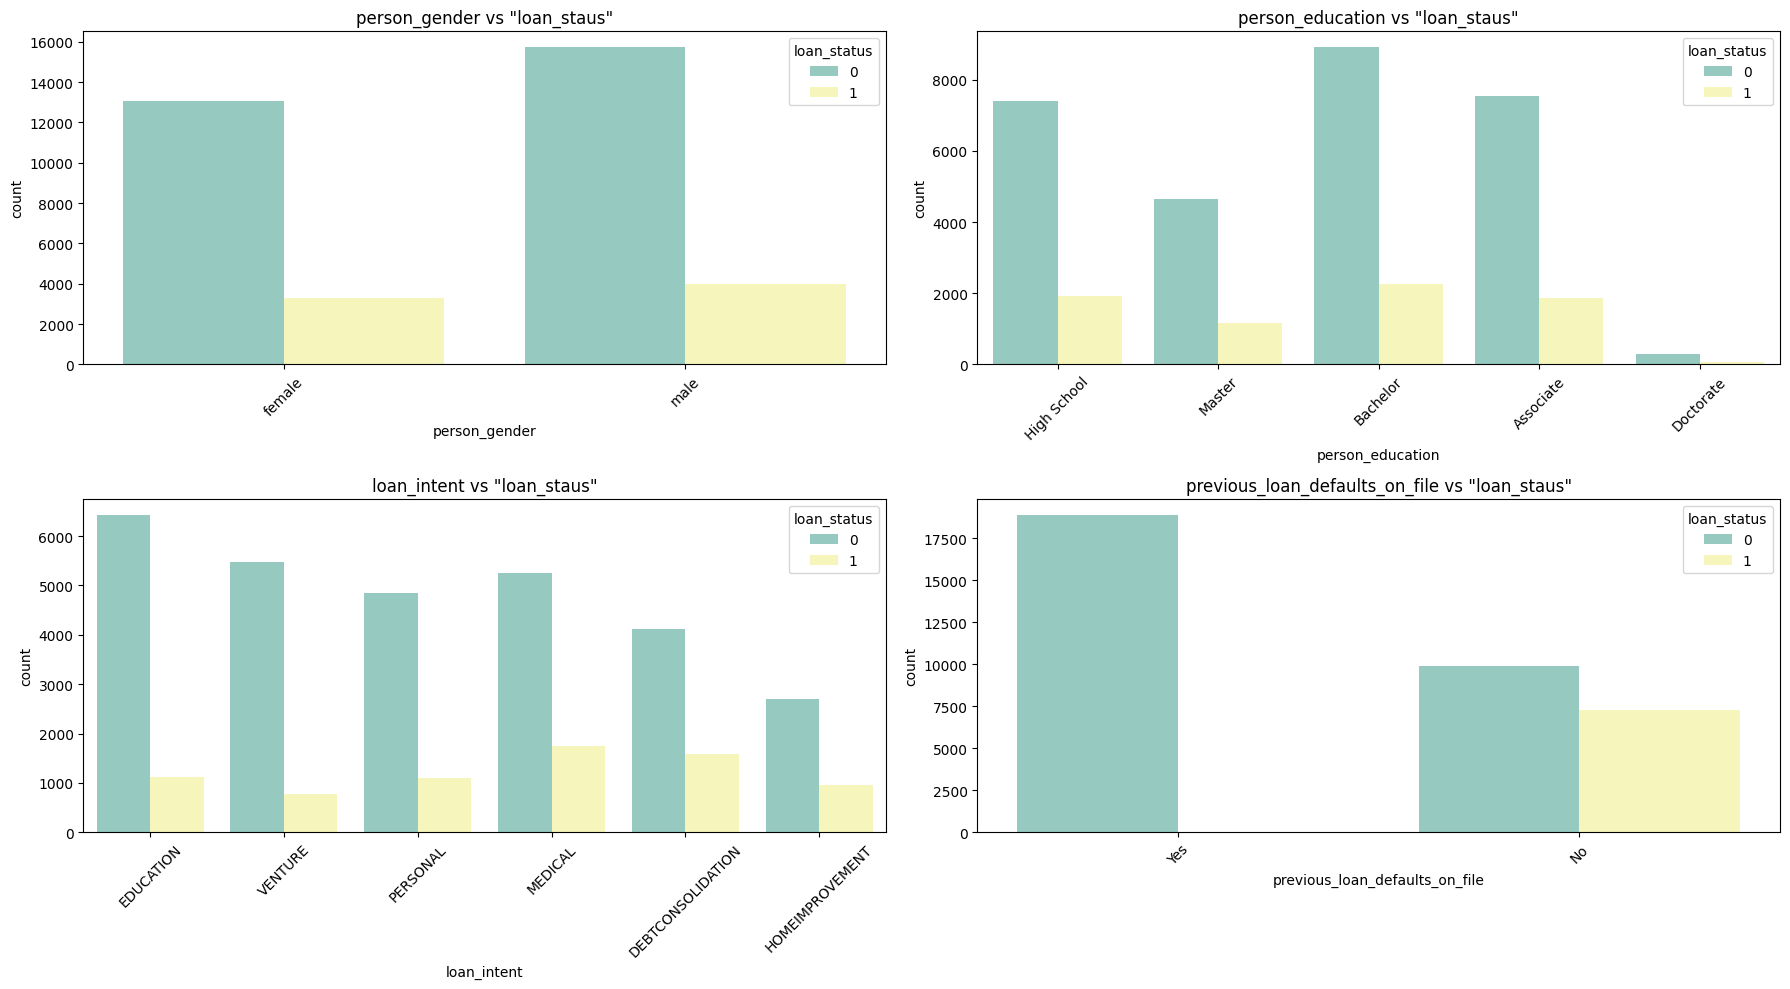

In [48]:
cat_col = loan_data_cleaned.select_dtypes(include=['object']).columns

cols_per_row = 2

rows =math.ceil(len(cat_col)/cols_per_row)
fig , axis = plt.subplots(rows,cols_per_row,figsize=(18,10))
axis = axis.flatten()

for i , col in enumerate(cat_col):
      sns.countplot(data= loan_data_cleaned,x = col,ax = axis[i],hue = "loan_status",palette='Set3')
      axis[i].set_title(f'{col} vs "loan_staus"')
      axis[i].tick_params(axis='x',rotation=45)

      
for j in range(len(cat_col),len(axis)):
      fig.delaxes(axis[j])      

plt.tight_layout()
plt.show()      
                


bar charts reveal some useful insights about loan status:

1.Gender & Loan Status: It looks like loan defaults happen at a similar rate across male and female applicants. No major difference there

2.Education & Loan Status: High school graduates seem to have more loan defaults compared to those with higher education levels. This could suggest that education impacts financial stability

3.Loan Intent & Loan Status: Debt consolidation loans have the highest default rate, while home improvement and personal loans seem relatively safer. This highlights how loan purpose affects repayment behavior

4.Previous Defaults & Loan Status: People who have defaulted before are more likely to default again. This is an important risk factor when assessing loan applications.



Loan Amount Distribution (Histogram)

"Distribution of Loan Amounts: Understanding Borrower Trends"

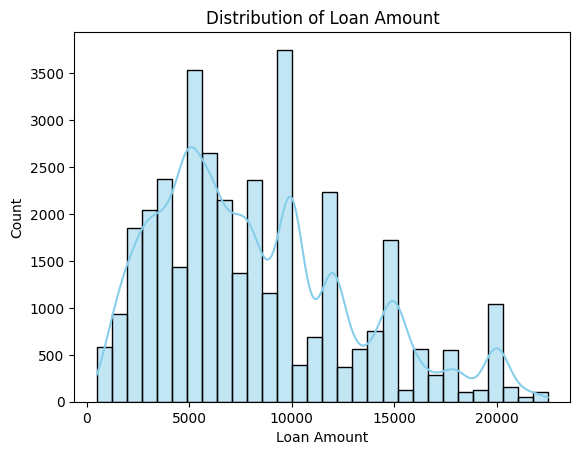

In [49]:
plt.Figure(figsize=(12,8))

sns.histplot(loan_data_cleaned['loan_amnt'],kde=True,bins=30,color='skyblue')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

1.Most Common Loan Amounts: The histogram shows that most loans fall within a specific range, meaning borrowers tend to take similar-sized loans

2.Outliers & Extreme Values: If the graph has peaks at very high or low amounts, those could represent unique borrowing behaviors.






Applicant Income vs Loan Amount (Scatterplot) 

In [50]:
loan_data_cleaned.columns

Index(['person_gender', 'person_education', 'person_income', 'person_emp_exp',
       'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'previous_loan_defaults_on_file',
       'loan_status', 'is_home_owner', 'credit_score_bucket', 'age_category'],
      dtype='object')

"Applicant Income vs Loan Amount: Exploring Borrower Trends & Loan Status Patterns"

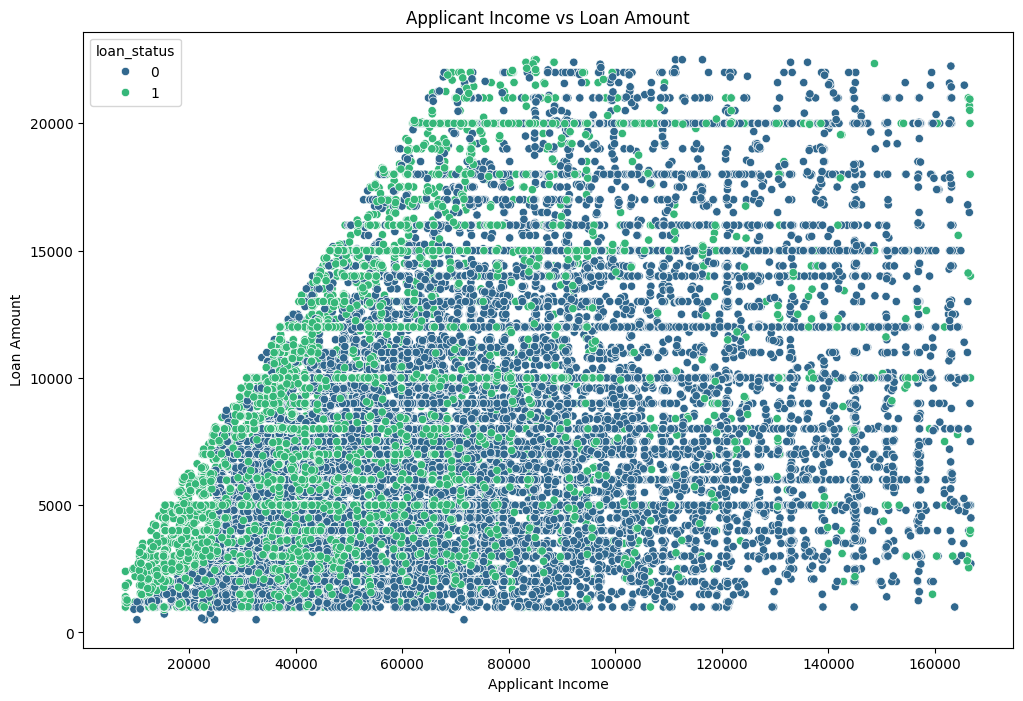

In [51]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=loan_data_cleaned,x='person_income',y = 'loan_amnt',hue='loan_status',palette='viridis')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

insights based on your scatter plot:

1.Positive Correlation: As applicant income increases, loan amounts also tend to increase, suggesting that higher earners are likely to qualify for larger loans.

2.Loan Status Differences: The color-coded dots indicate loan status. If one color clusters toward higher loan amounts or higher incomes, it may suggest a trend in loan approvals or defaults.

3.Potential Outliers: There may be extreme values where certain applicants received unexpectedly large or small loans compared to their income. These could be interesting points to analyze further.


Credit History vs Loan Status (Bar Plot)

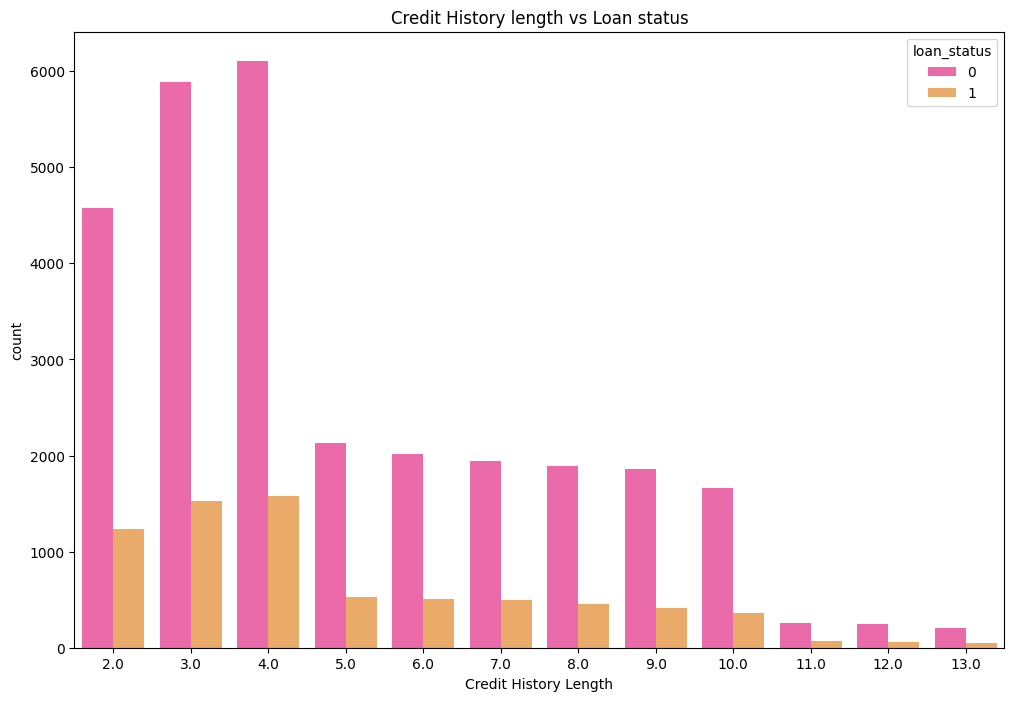

In [52]:
plt.figure(figsize=(12,8))

sns.countplot(data=loan_data_cleaned,x = 'cb_person_cred_hist_length',hue='loan_status',palette='spring')
plt.title("Credit History length vs Loan status")
plt.xlabel("Credit History Length")
plt.show()

1.Short Credit Histories Dominate the Dataset
Most applicants have 2 to 4 years of credit history.These buckets have the highest number of applications, but also the highest number of rejections.

2.Loan Approval Rate Drops as Credit History Increases
Surprisingly, as credit history length increases beyond 5 years, the total number of applications drops, but approval rates don't improve much.Even with 10–13 years of credit history, approval counts remain very low.

3.Low Approval Rate Across All Bins
In every credit history length, rejected loans (pink) dominate over approved loans (orange).This shows credit history length alone is not enough to guarantee loan approval

4.Best Approval Odds Seem Around 3–4 Years
While rejections are high, the relative number of approvals is also highest at 3–4 years.Could indicate that 3–4 years is a sweet spot where credit history is long enough to show creditworthiness, but the applicant is still active.







Step: Splitting the Data

Here’s how you can split the data using train_test_split from scikit-learn:

In [53]:
from sklearn.model_selection import  train_test_split

x = df_encoded.drop(columns=['loan_status'],axis=1)
y = df_encoded['loan_status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(f"training data{x_train.shape,y_train.shape}")
print(f"test data shape{x_test.shape,y_test.shape}")

training data((28852, 22), (28852,))
test data shape((7213, 22), (7213,))
